# 🛍️ Retail Sales Analysis (EDA + Regression + Time Series)


## 📌 Introduction
This project analyzes an e-commerce retail dataset using:
- Exploratory Data Analysis (EDA)
- Linear Regression
- Time Series Analysis
It helps identify:
- Top-selling products
- High-revenue customers
- Revenue trends over time
## 🔧 Libraries Used
- pandas
- matplotlib
- seaborn
- scikit-learn

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
#Loading Data
df=pd.read_csv('online_sales.csv')

In [34]:
#Cleaning Columns
df.columns=df.columns.str.strip()

In [35]:
#Handling Missing Values
df=df[df['Description'].notnull()]
df=df[df['Customer ID'].notnull()]

In [36]:
#Converting InvoiceDate to datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

## 📊 Daily Revenue Trend
This shows how revenue varies on a daily basis. We remove negative and zero sales to clean the data.


In [37]:
# Calculating the Revenue
df['Revenue']=df['Quantity']*df['Price']

# Filtering the Valid Sales
sales_df=df[(df['Quantity']>0)&(df['Price']>0)]

# Grouping by Date
daily_revenue=sales_df.groupby(sales_df['InvoiceDate'].dt.date)['Revenue'].sum()

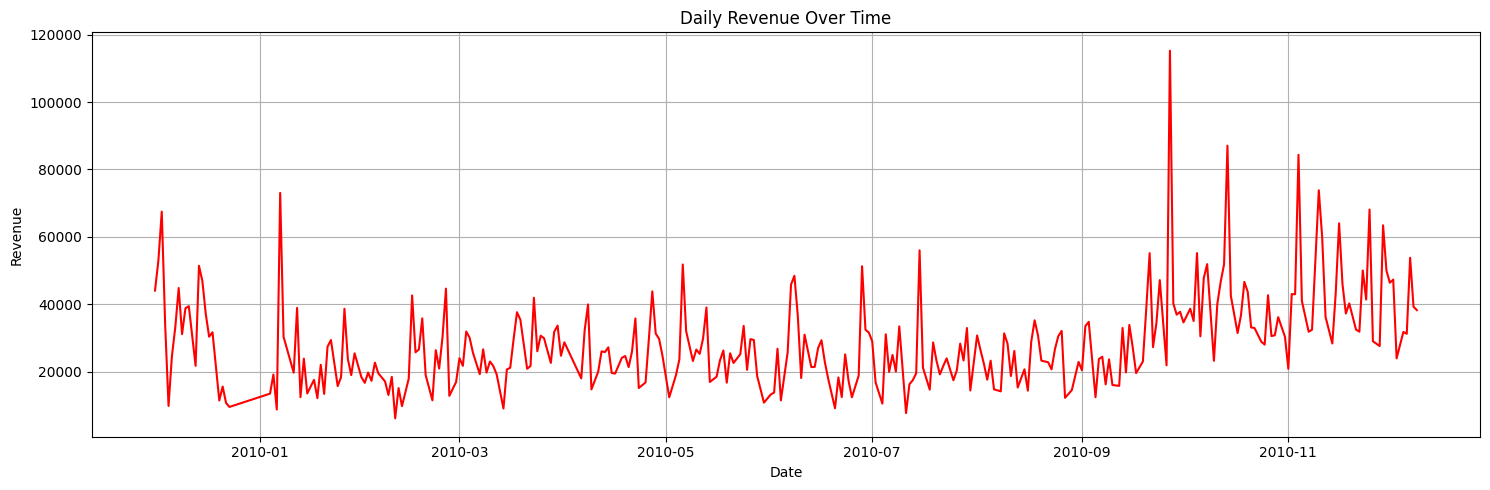

In [38]:
# Plot
plt.figure(figsize=(15, 5))
daily_revenue.plot(color='red') 
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📆 Monthly Revenue Trend
This analysis tracks revenue across each month. It helps identify:
- Peak months in terms of revenue
- Seasonal performance patterns
- Business growth or drop-off over time

We group invoices by month and calculate total revenue.

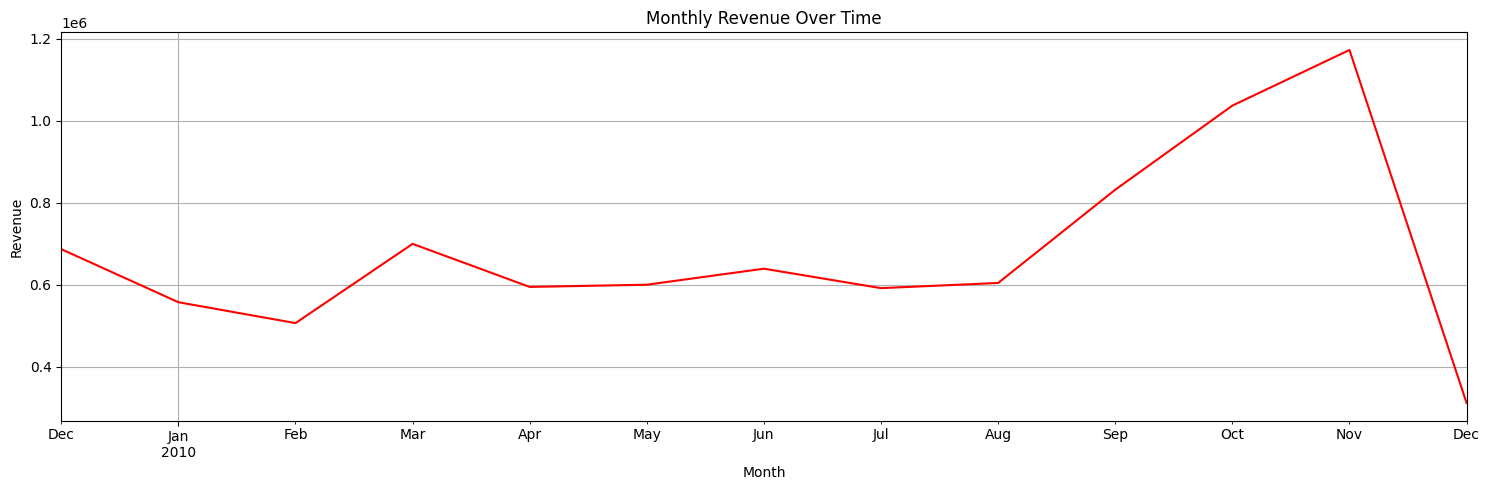

In [39]:
daily_revenue=sales_df.groupby(sales_df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()
#plot
plt.figure(figsize=(15, 5))
daily_revenue.plot(color='red') 
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

## 🛒 Top 10 Best-Selling Products
This section identifies the top 10 products that generated the highest revenue.

🧠 Why it's important:
- Helps focus inventory on high-performing items
- Useful for product recommendations, promotions, or marketing decisions

In [40]:
#Grouping by Products
top_products=sales_df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
WHITE HANGING HEART T-LIGHT HOLDER     151624.31
REGENCY CAKESTAND 3 TIER               143893.35
Manual                                  98560.64
ASSORTED COLOUR BIRD ORNAMENT           70493.83
JUMBO BAG RED RETROSPOT                 51759.30
POSTAGE                                 48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR     40186.65
PAPER CHAIN KIT 50'S CHRISTMAS          36933.50
PARTY BUNTING                           35035.90
EDWARDIAN PARASOL NATURAL               34044.75
Name: Revenue, dtype: float64


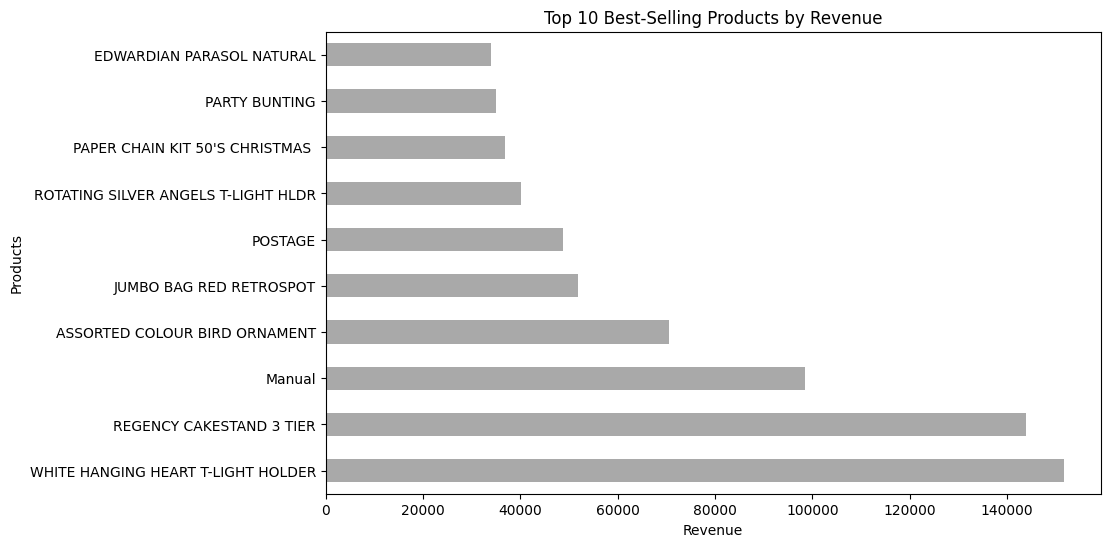

In [41]:
#plot
top_products.plot(kind='barh', figsize=(10,6), title='Top 10 Best-Selling Products by Revenue',color='darkgrey')
plt.xlabel('Revenue')
plt.ylabel('Products')
plt.show()

## 🙋‍♂️ Top 10 Customers by Revenue
This section shows which customers brought the most money to the business.

🎯 Use Cases:
- Customer segmentation
- Loyalty rewards or retention strategy
- Personalized offers or upselling

In [42]:
#Grouping by Customer ID
top_customers=sales_df.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)
top_customers.index = top_customers.index.astype(int)
print(top_customers)

Customer ID
18102    349164.35
14646    248396.50
14156    196566.74
14911    152147.57
13694    131443.19
17511     84541.17
15061     83284.38
16684     80489.21
16754     65500.07
17949     60117.60
Name: Revenue, dtype: float64


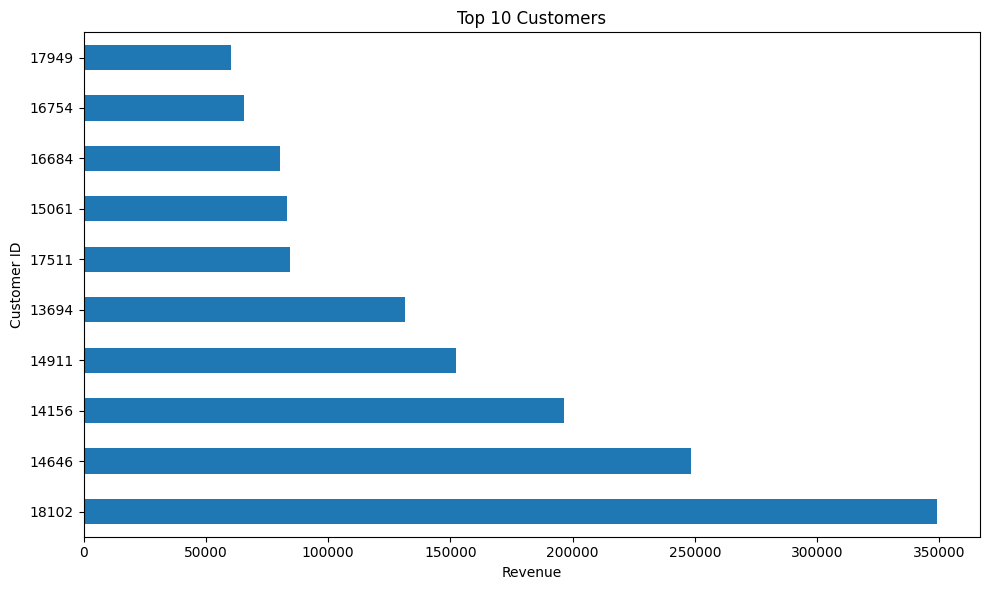

In [43]:
#plot
top_customers.plot(kind='barh', figsize=(10,6), title='Top 10 Customers')
plt.xlabel('Revenue')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

## 🌍 Top 10 Countries by Revenue
Here we compare which countries brought in the highest revenue.

🔍 Useful for:
- Targeting regions for expansion
- Geo-marketing strategies
- Understanding customer distribution globally

In [44]:
#Grouping by Country
top_countries=sales_df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_countries)

Country
United Kingdom    7414755.963
EIRE               356085.210
Netherlands        268786.000
Germany            202395.321
France             146215.420
Sweden              53171.390
Denmark             50906.850
Spain               47601.420
Switzerland         43921.390
Australia           31446.800
Name: Revenue, dtype: float64


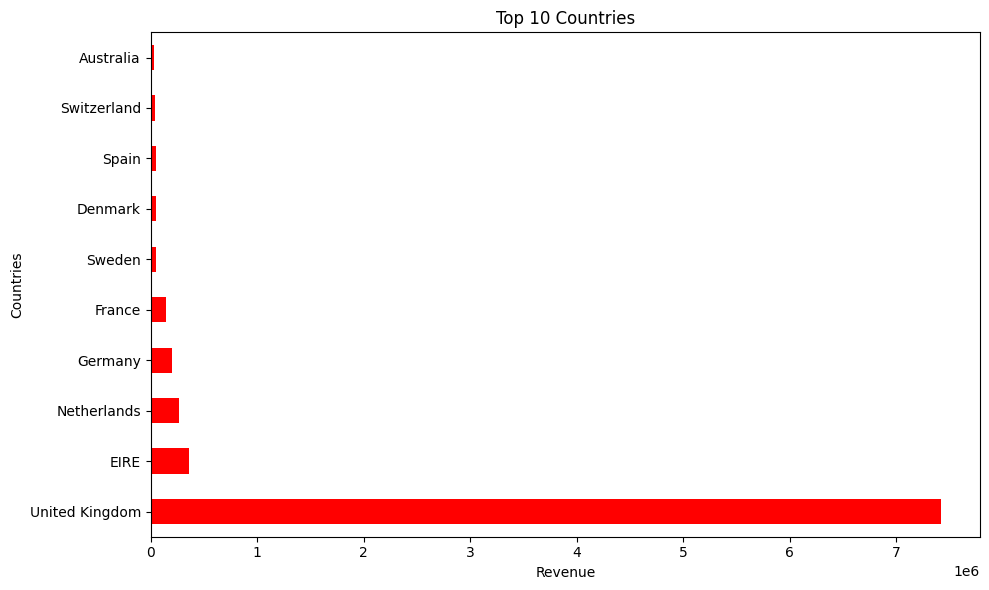

In [45]:
#plot
top_countries.plot(kind='barh',figsize=(10,6),title='Top 10 Countries',color='red')
plt.xlabel('Revenue')
plt.ylabel('Countries')
plt.tight_layout()
plt.show()

## 📈 Regression Model Performance
- R² Score: `0.1853`
- MSE: `4091.54`

The model attempts to predict revenue using Quantity, Price, Month, and Country/Product encoding.

In [46]:
#Filtering valid Sales
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month

# Marking top 10 most frequent products, all others labeled as 'Other'
top_items = df['Description'].value_counts().head(10).index
df['TopProduct'] = df['Description'].apply(lambda x: x if x in top_items else 'Other')

#Converting 'TopProduct' and 'Country' into numeric dummy variables for regression
df_encoded = pd.get_dummies(df, columns=['TopProduct', 'Country'], drop_first=True)

X = df_encoded[['Price', 'Month'] + [col for col in df.columns if col.startswith('TopProduct_') or col.startswith('Country_')]]
y = df_encoded['Revenue']

In [47]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.18532486646565094
MSE: 4091.5458659059746


## 📅 Time Series (Smoothed Trend)
This shows how revenue moves over time using a 7-day moving average to reveal seasonality and trends.

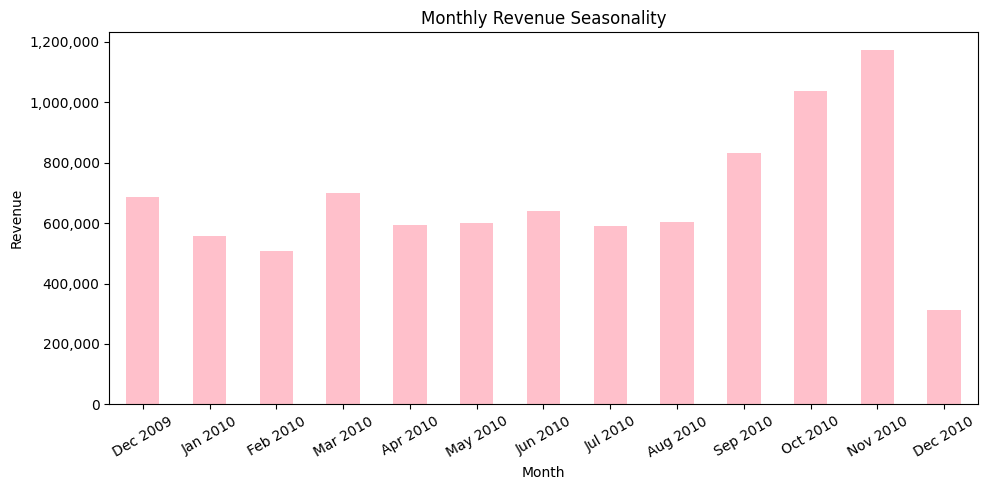

In [48]:
df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
monthly_revenue = df.groupby('Month')['Revenue'].sum()
monthly_revenue.index = monthly_revenue.index.strftime('%b %Y')

#plot
ax=monthly_revenue.plot(kind='bar', figsize=(10,5), title='Monthly Revenue Seasonality', color='pink')
plt.xlabel('Month')
plt.ylabel('Revenue')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## 📉 Smoothed Daily Revenue Trend
We use a 7-day moving average to smooth out daily fluctuations in revenue and highlight overall patterns.

📌 Insights Gained:
- Long-term revenue trend visibility
- Detect drops, spikes, or seasonality
- Great for dashboards and forecasting

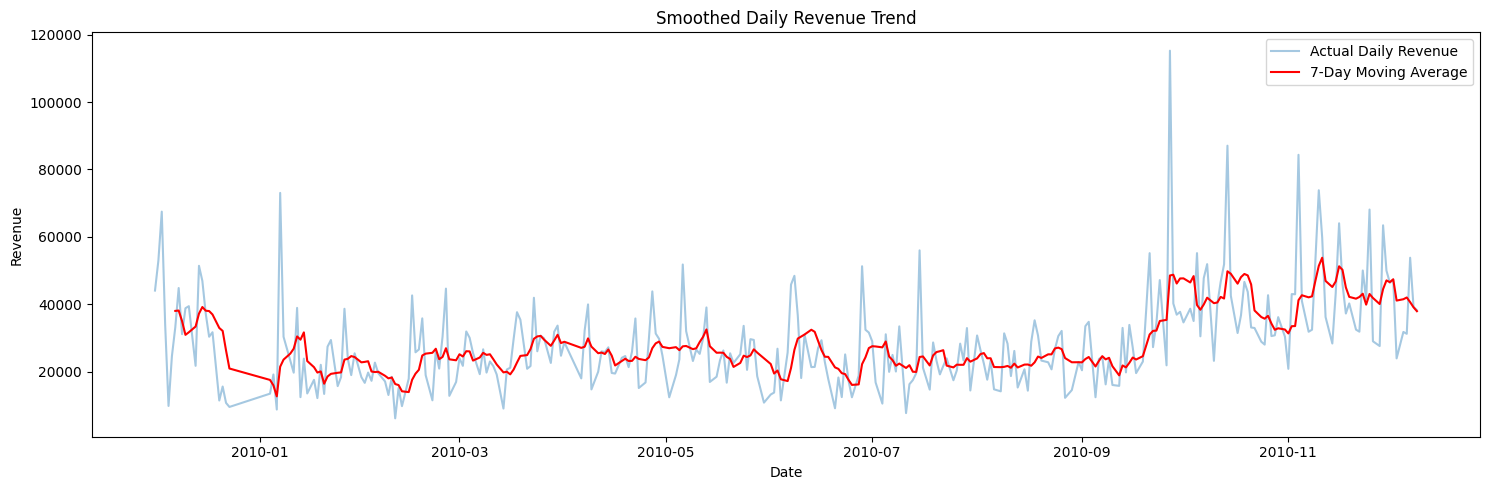

In [ ]:
daily_revenue = df[df['Quantity'] > 0].groupby(df['InvoiceDate'].dt.date)['Revenue'].sum()
smooth_revenue = daily_revenue.rolling(window=7).mean()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(daily_revenue.index, daily_revenue.values, label='Actual Daily Revenue', alpha=0.4)
plt.plot(smooth_revenue.index, smooth_revenue.values, label='7-Day Moving Average', color='red')
plt.title('Smoothed Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
df.to_csv('cleaned_online_sales.csv', index=False)